<a href="https://colab.research.google.com/github/ilayyd/HomeWork/blob/main/covid19project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv('/content/metadata.csv', nrows=500)
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [3]:
vaccine_papers = df[df['abstract'].str.contains("vaccine", case=False, na=False)]

print(f"Found {len(vaccine_papers)} papers mentioning 'vaccine'.")

vaccine_papers[['title', 'abstract', 'publish_time']].head()

Found 56 papers mentioning 'vaccine'.


,title,abstract,publish_time
17,Logistics of community smallpox control throug...,BACKGROUND: Previous smallpox ring vaccination...,2004-08-06
31,Australian public health policy in 2003 – 2004,"In Australia, compared with other developed co...",2005-04-06
32,GIDEON: a comprehensive Web-based resource for...,GIDEON (Global Infectious Diseases and Epidemi...,2005-04-22
58,From Functional Genomics to Functional Immunom...,The development of DNA microarray technology a...,2006-07-28
64,Model-Based Design of Growth-Attenuated Viruses,Live-virus vaccines activate both humoral and ...,2006-09-01


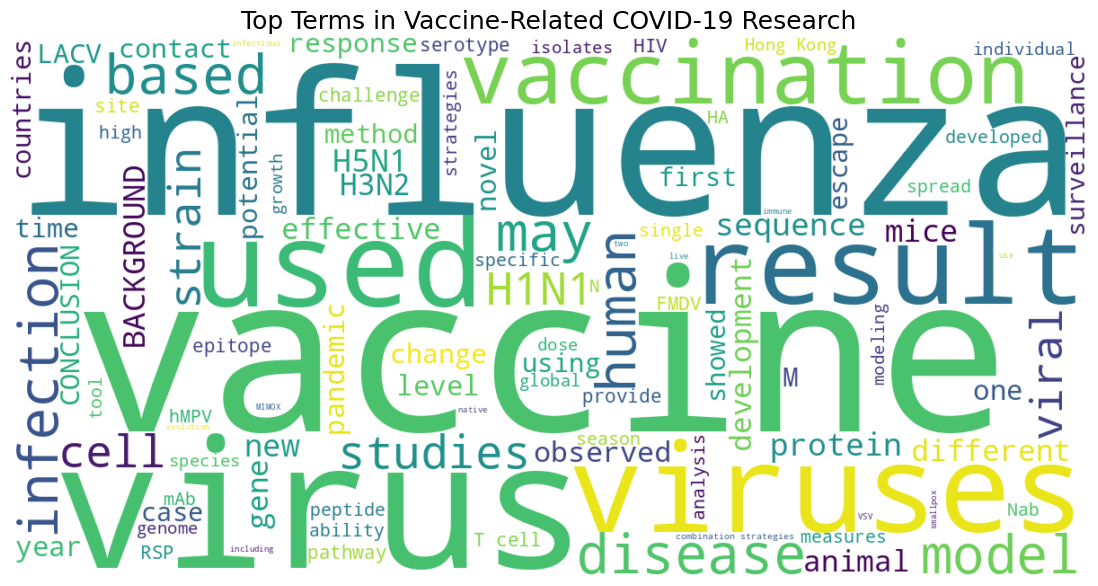

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

text = " ".join(vaccine_papers['abstract'].dropna())[:50000]

wordcloud = WordCloud(width=1200, height=600, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Terms in Vaccine-Related COVID-19 Research", fontsize=18)
plt.show()

In [5]:
treatment_papers = df[df['abstract'].str.contains("treatment", case=False, na=False)]

print(f"Found {len(treatment_papers)} papers mentioning 'treatment'.")

treatment_papers[['title', 'abstract', 'publish_time']].head()

Found 64 papers mentioning 'treatment'.


,title,abstract,publish_time
15,"Multi-faceted, multi-versatile microarray: sim...",There are hundreds of viruses that infect diff...,2004-05-26
36,"Neutrophil elastase, an acid-independent serin...",BACKGROUND: Mammalian reoviruses naturally inf...,2005-05-31
46,Development of a humanized monoclonal antibody...,Neutralization of West Nile virus (WNV) in viv...,2005-04-24
48,On pandemics and the duty to care: whose duty?...,BACKGROUND: As a number of commentators have n...,2006-04-20
49,Epicatechins Purified from Green Tea (Camellia...,The anticancer potential of catechins derived ...,2006-04-25


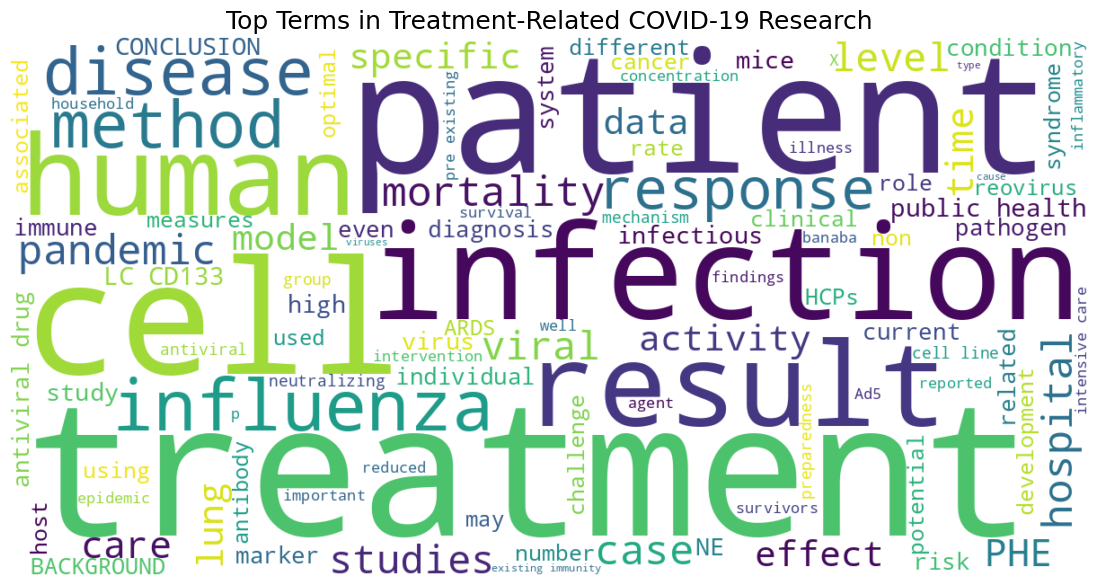

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_treatment = " ".join(treatment_papers['abstract'].dropna())[:50000]

wordcloud_treatment = WordCloud(width=1200, height=600, background_color='white', max_words=100).generate(text_treatment)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_treatment, interpolation='bilinear')
plt.axis('off')
plt.title("Top Terms in Treatment-Related COVID-19 Research", fontsize=18)
plt.show()

In [7]:
import pandas as pd
import os

df = pd.read_csv('/content/metadata.csv', nrows=1000)

keywords = ['treatment', 'drug', 'antiviral', 'remdesivir', 'hydroxychloroquine', 'dexamethasone', 'efficacy']

treatment_papers = df[df['abstract'].fillna('').str.contains('|'.join(keywords), case=False)]

print(f"Found {len(treatment_papers)} papers mentioning treatment-related terms.")

treatment_papers[['title', 'abstract', 'publish_time']].head()

Found 230 papers mentioning treatment-related terms.


,title,abstract,publish_time
15,"Multi-faceted, multi-versatile microarray: sim...",There are hundreds of viruses that infect diff...,2004-05-26
17,Logistics of community smallpox control throug...,BACKGROUND: Previous smallpox ring vaccination...,2004-08-06
20,Managing emerging infectious diseases: Is a fe...,In the 1980's and 1990's HIV/AIDS was the emer...,2004-11-19
32,GIDEON: a comprehensive Web-based resource for...,GIDEON (Global Infectious Diseases and Epidemi...,2005-04-22
36,"Neutrophil elastase, an acid-independent serin...",BACKGROUND: Mammalian reoviruses naturally inf...,2005-05-31


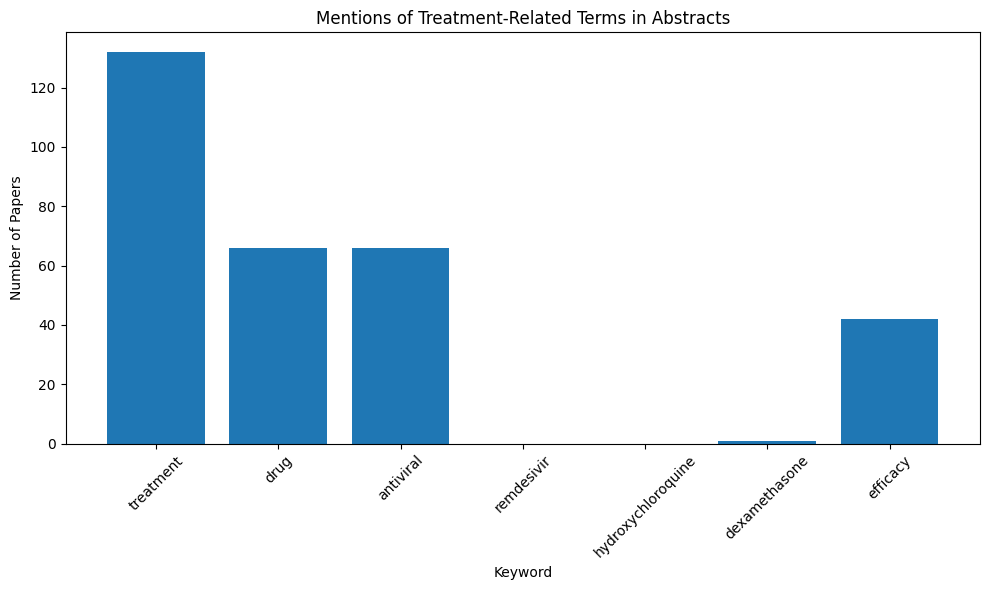

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/metadata.csv', nrows=1000)

keywords = ['treatment', 'drug', 'antiviral', 'remdesivir', 'hydroxychloroquine', 'dexamethasone', 'efficacy']

treatment_papers = df[df['abstract'].fillna('').str.contains('|'.join(keywords), case=False)]

keyword_counts = {k: treatment_papers['abstract'].str.contains(k, case=False).sum() for k in keywords}

plt.figure(figsize=(10, 6))
plt.bar(keyword_counts.keys(), keyword_counts.values())
plt.title("Mentions of Treatment-Related Terms in Abstracts")
plt.ylabel("Number of Papers")
plt.xlabel("Keyword")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

df = pd.read_csv('/content/metadata.csv', nrows=500)

df[['title', 'abstract']].head()

,title,abstract
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...


In [10]:
treatment_keywords = [
    "remdesivir", "paxlovid", "molnupiravir", "monoclonal antibodies",
    "hydroxychloroquine", "ivermectin", "dexamethasone", "convalescent plasma"
]

keyword_counts = {term: df['abstract'].str.contains(term, case=False, na=False).sum()
                  for term in treatment_keywords}

keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=["Treatment", "Mentions"])
keyword_df.sort_values(by="Mentions", ascending=False, inplace=True)
keyword_df

,Treatment,Mentions
3,monoclonal antibodies,8
6,dexamethasone,1
1,paxlovid,0
0,remdesivir,0
2,molnupiravir,0
4,hydroxychloroquine,0
5,ivermectin,0
7,convalescent plasma,0


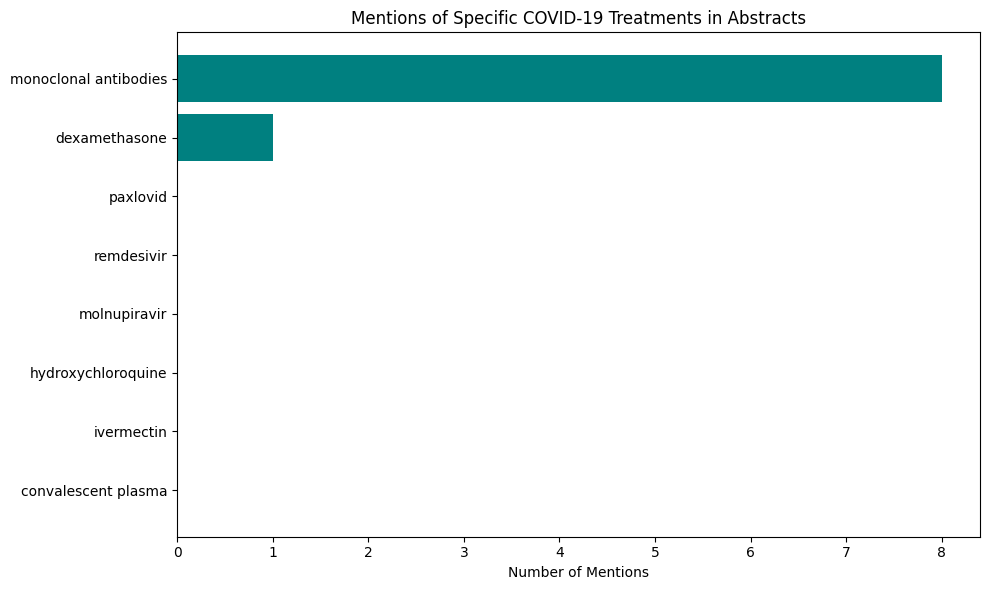

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(keyword_df['Treatment'], keyword_df['Mentions'], color='teal')
plt.xlabel('Number of Mentions')
plt.title('Mentions of Specific COVID-19 Treatments in Abstracts')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
df = pd.read_csv('/content/metadata.csv', nrows=2000)

In [13]:
treatment_keywords = [
    "remdesivir", "paxlovid", "molnupiravir", "hydroxychloroquine",
    "ivermectin", "monoclonal antibodies", "dexamethasone", "convalescent plasma"
]

keyword_counts = {
    term: df['abstract'].str.contains(term, case=False, na=False).sum()
    for term in treatment_keywords
}

keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=["Treatment", "Mentions"])
keyword_df.sort_values(by="Mentions", ascending=False, inplace=True)
keyword_df

,Treatment,Mentions
5,monoclonal antibodies,33
6,dexamethasone,3
7,convalescent plasma,1
0,remdesivir,0
3,hydroxychloroquine,0
2,molnupiravir,0
1,paxlovid,0
4,ivermectin,0


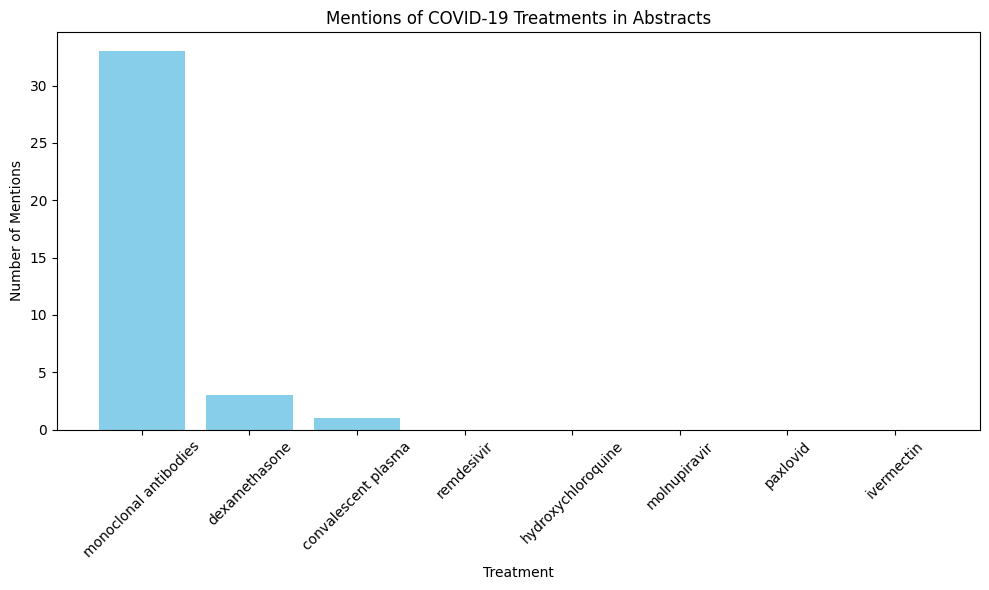

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(keyword_df['Treatment'], keyword_df['Mentions'], color='skyblue')
plt.title("Mentions of COVID-19 Treatments in Abstracts")
plt.ylabel("Number of Mentions")
plt.xlabel("Treatment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import re

df = pd.read_csv('/content/metadata.csv', nrows=5000)

selected_treatments = ['monoclonal antibodies', 'dexamethasone', 'convalescent plasma']
effectiveness_keywords = ['effective', 'efficacy', 'ineffective', 'reduced', 'improved', 'treatment response']

matching_sentences = []

for abstract in df['abstract'].dropna():
    sentences = re.split(r'(?<=[.!?])\s+', abstract)
    for sentence in sentences:
        if any(treat in sentence.lower() for treat in selected_treatments) and \
           any(eff in sentence.lower() for eff in effectiveness_keywords):
            matching_sentences.append(sentence.strip())

matching_sentences[:10]

['BACKGROUND: The isolation of human monoclonal antibodies (mAbs) that neutralize a broad spectrum of primary HIV-1 isolates and the characterization of the human neutralizing antibody B cell response to HIV-1 infection are important goals that are central to the design of an effective antibody-based vaccine.',
 'School closures were effective in reducing pH1N1 transmission, oseltamivir was effective for treatment of severe cases while convalescent plasma therapy has the potential to mitigate future pandemics.',
 'Additionally, we also show that monoclonal antibodies against GGT effectively inhibited GGT activity and successfully suppressed H.',
 'However, due to the antigenic differences among the five ebolavirus species, the current therapeutic monoclonal antibodies are only effective against viruses of the species Zaire ebolavirus.',
 'OBJECTIVES: This study aimed to expressed the gD protein of BV in Escherichia coli by a recombinant vector, and prepare specific monoclonal antibodie